In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Only the 10,000 most common words will be considered
vocab_size = 10000
# Words will be turned into vectors of 16 numbers for the model to understand relationships between words
embedding_dim = 16
# Sentences will be cut off or padded to fit exactly 100 words
max_length = 100
# Delete if it goes over 100
trunc_type='post'
# Pad with 0's if it goes under 100 words
padding_type='post'
# Replace any unknown word in the 10,000 word dictionary into 00V
oov_tok = "<OOV>"
# How many examples to be used in the training model
training_size = 20000

In [6]:
# Library allows python to download data from the internet
import requests

url = "https://storage.googleapis.com/learning-datasets/sarcasm.json"
response = requests.get(url)
with open("sarcasm.json", 'wb') as f:  # saves in current folder
    f.write(response.content)

# Load JSON data
with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Prepare sentences and labels
sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

print("Number of samples:", len(sentences))
print("Example headline:", sentences[0], "| Label:", labels[0])

Number of samples: 26709
Example headline: former versace store clerk sues over secret 'black code' for minority shoppers | Label: 0


In [7]:
# Slicing the data
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [8]:
# Tokenizing + Making a dictionary with max number of words + what to replace it with
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

# Creating dictionary

word_index = tokenizer.word_index

# Maintaining the length by padding and truncating
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [9]:
import numpy as np

# Converts training sentences into a NumPy array
# Neural networks need numbers in array form for fast computation
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [16]:
# Creates a sequential model: a stack of layers, one after another
# Sequential means the input flows through the layers in order
model = tf.keras.Sequential([
    # Embedding layer: converts words (numbers) into dense vectors that capture meaning
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # Reduces the 100×16 matrix into a single 16-number vector
    tf.keras.layers.GlobalAveragePooling1D(),
    # A Dense (fully connected) layer with 24 neurons
    # activation='relu' → introduces non-linearity, allowing the model to learn complex patterns
    tf.keras.layers.Dense(24, activation='relu'),
    # The output layer with 1 neuron because this is a binary classification problem (sarcastic or not)
    # activation='sigmoid' → outputs a number between 0 and 1 (interpreted as probability of sarcasm)
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Compiles the model before training
model.compile(
    # The loss function measures how wrong the model is during training
    loss='binary_crossentropy',
    # The optimizer is the coach that updates the model's weights (the knobs it adjusts) to reduce the loss
    optimizer='adam',
    # This doesn’t affect training itself (that’s the loss + optimizer), but it shows  how well the model is doing
    metrics=['accuracy'])

model.summary()

C:\Users\denni\PycharmProjects\PythonProject\NaturalLanguageProcessing\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Train the model for 30 epochs on training data, validate on testing data, and save training history

num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - 3ms/step - accuracy: 0.9330 - loss: 0.1719 - val_accuracy: 0.8489 - val_loss: 0.3842
Epoch 2/30
625/625 - 2s - 3ms/step - accuracy: 0.9434 - loss: 0.1524 - val_accuracy: 0.8489 - val_loss: 0.3905
Epoch 3/30
625/625 - 1s - 2ms/step - accuracy: 0.9417 - loss: 0.1528 - val_accuracy: 0.8471 - val_loss: 0.3991
Epoch 4/30
625/625 - 2s - 3ms/step - accuracy: 0.9417 - loss: 0.1485 - val_accuracy: 0.8460 - val_loss: 0.4109
Epoch 5/30
625/625 - 2s - 2ms/step - accuracy: 0.9487 - loss: 0.1365 - val_accuracy: 0.8320 - val_loss: 0.4490
Epoch 6/30
625/625 - 2s - 3ms/step - accuracy: 0.9481 - loss: 0.1349 - val_accuracy: 0.8517 - val_loss: 0.4166
Epoch 7/30
625/625 - 2s - 3ms/step - accuracy: 0.9546 - loss: 0.1228 - val_accuracy: 0.8489 - val_loss: 0.4267
Epoch 8/30
625/625 - 2s - 3ms/step - accuracy: 0.9531 - loss: 0.1250 - val_accuracy: 0.8498 - val_loss: 0.4385
Epoch 9/30
625/625 - 2s - 3ms/step - accuracy: 0.9599 - loss: 0.1121 - val_accuracy: 0.8468 - val_loss: 0.4518
E

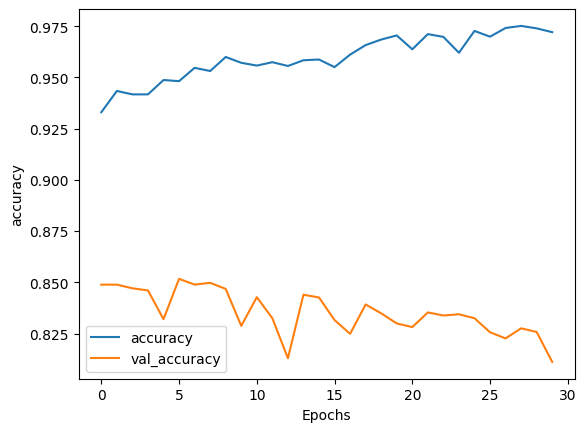

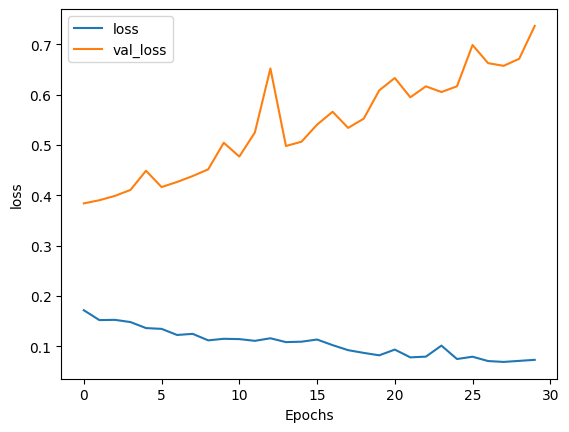

In [25]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [34]:
# Use the training model

sentence = [input("Enter sentence to detect Sarcasm: ")]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[0.00012964]]
